In [32]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr 

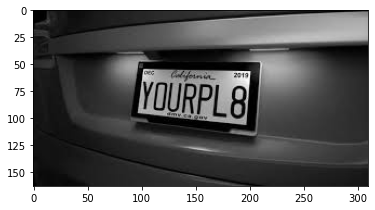

In [92]:
img=cv2.imread('plaque7.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


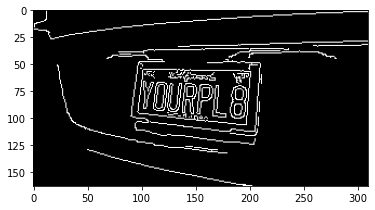

In [93]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [94]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [95]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break


In [96]:
location

array([[[101,  56]],

       [[ 98,  96]],

       [[197, 106]],

       [[201,  57]]], dtype=int32)

In [97]:
mask=np.zeros(gray.shape, np.uint8)
new_image=cv2.drawContours(mask, [location], 0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

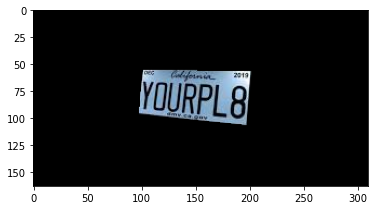

In [98]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [99]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
croped_image=gray[x1:x2+1,y1:y2+1]


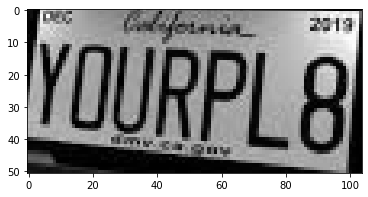

In [100]:
plt.imshow(cv2.cvtColor(croped_image, cv2.COLOR_BGR2RGB))

In [101]:
reader=easyocr.Reader(['en'])
result=reader.readtext(croped_image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [102]:
result

[([[0, 0], [104, 0], [104, 51], [0, 51]], 'YOURPL&', 0.6307885281443724)]

In [104]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res=cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


YOURPL&
